# 9장 텍스트를 위한 인공 신경망
한빛 마켓의 댓글을 분석하라!

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


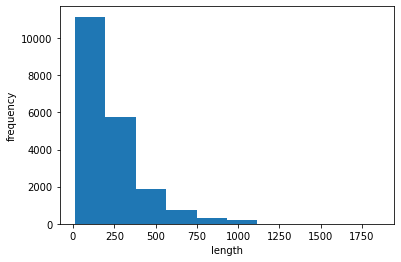

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
print(train_oh.shape)

(20000, 100, 500)


In [21]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [22]:
print(np.sum(train_oh[0][0]))

1.0


In [23]:
val_oh = keras.utils.to_categorical(val_seq)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [28]:
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 47ms/step - loss: 0.6971 - accuracy: 0.5073 - val_loss: 0.6979 - val_accuracy: 0.5020
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6943 - accuracy: 0.5155 - val_loss: 0.6963 - val_accuracy: 0.5068
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6949 - val_accuracy: 0.5124
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6904 - accuracy: 0.5296 - val_loss: 0.6939 - val_accuracy: 0.5138
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6888 - accuracy: 0.5379 - val_loss: 0.6929 - val_accuracy: 0.5142
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6872 - accuracy: 0.5429 - val_loss: 0.6921 - val_accuracy: 0.5194
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6857 - accuracy: 0.5506 - val_loss: 0.6913 - val_ac

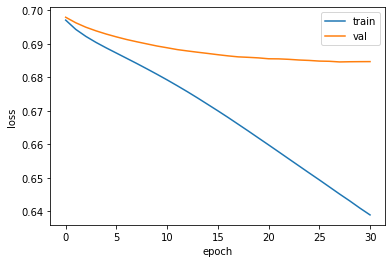

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [31]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [33]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [34]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')

In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.6953 - accuracy: 0.5081 - val_loss: 0.6950 - val_accuracy: 0.5152
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6833 - accuracy: 0.5676 - val_loss: 0.6718 - val_accuracy: 0.6190
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6563 - accuracy: 0.6549 - val_loss: 0.6463 - val_accuracy: 0.6754
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6283 - accuracy: 0.7027 - val_loss: 0.6204 - val_accuracy: 0.7096
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6022 - accuracy: 0.7321 - val_loss: 0.6008 - val_accuracy: 0.7252
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5811 - accuracy: 0.7482 - val_loss: 0.5813 - val_accuracy: 0.7416
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5628 - accuracy: 0.7612 - val_loss: 0.5646 - val_accuracy

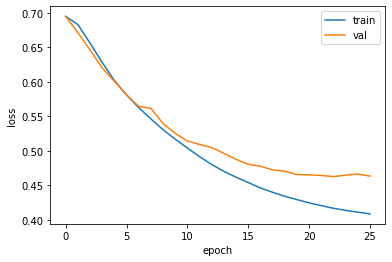

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [39]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (testInput, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [41]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [44]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6921 - accuracy: 0.5352 - val_loss: 0.6911 - val_accuracy: 0.5644
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6870 - accuracy: 0.6198 - val_loss: 0.6809 - val_accuracy: 0.6682
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6466 - accuracy: 0.6931 - val_loss: 0.6097 - val_accuracy: 0.7088
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5903 - accuracy: 0.7196 - val_loss: 0.5820 - val_accuracy: 0.7274
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5644 - accuracy: 0.7434 - val_loss: 0.5595 - val_accuracy: 0.7466
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5428 - accuracy: 0.7582 - val_loss: 0.5420 - val_accuracy: 0.7642
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5232 - accuracy: 0.7717 - val_loss: 0.5215 - val_ac

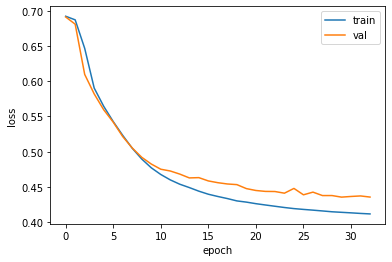

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [46]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [47]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 49ms/step - loss: 0.6923 - accuracy: 0.5438 - val_loss: 0.6915 - val_accuracy: 0.5912
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6901 - accuracy: 0.6029 - val_loss: 0.6885 - val_accuracy: 0.6288
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6845 - accuracy: 0.6427 - val_loss: 0.6798 - val_accuracy: 0.6430
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6571 - accuracy: 0.6263 - val_loss: 0.6283 - val_accuracy: 0.6624
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6071 - accuracy: 0.7146 - val_loss: 0.5996 - val_accuracy: 0.7334
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5839 - accuracy: 0.7385 - val_loss: 0.5822 - val_accuracy: 0.7412
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5663 - accuracy: 0.7486 - val_loss: 0.5635 - val_ac

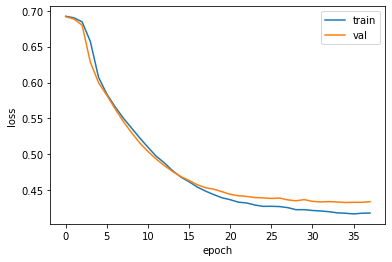

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [49]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [50]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history =  model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                      validation_data=(val_seq, val_target),
                      callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 34s 94ms/step - loss: 0.6928 - accuracy: 0.5315 - val_loss: 0.6926 - val_accuracy: 0.5458
Epoch 2/100
313/313 [==============================] - 29s 92ms/step - loss: 0.6915 - accuracy: 0.5788 - val_loss: 0.6904 - val_accuracy: 0.6090
Epoch 3/100
313/313 [==============================] - 30s 95ms/step - loss: 0.6864 - accuracy: 0.6328 - val_loss: 0.6808 - val_accuracy: 0.6476
Epoch 4/100
313/313 [==============================] - 29s 92ms/step - loss: 0.6572 - accuracy: 0.6651 - val_loss: 0.6151 - val_accuracy: 0.7042
Epoch 5/100
313/313 [==============================] - 29s 91ms/step - loss: 0.5738 - accuracy: 0.7236 - val_loss: 0.5466 - val_accuracy: 0.7394
Epoch 6/100
313/313 [==============================] - 29s 93ms/step - loss: 0.5403 - accuracy: 0.7387 - val_loss: 0.5203 - val_accuracy: 0.7566
Epoch 7/100
313/313 [==============================] - 30s 97ms/step - loss: 0.5159 - accuracy: 0.7552 - val_loss: 0.5006 - val_ac

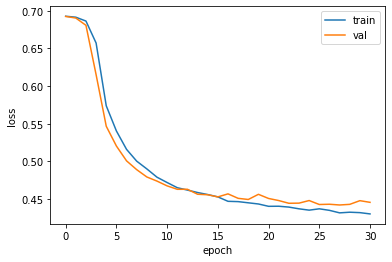

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [53]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [54]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [55]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 51ms/step - loss: 0.6922 - accuracy: 0.5280 - val_loss: 0.6910 - val_accuracy: 0.5544
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6898 - accuracy: 0.5681 - val_loss: 0.6883 - val_accuracy: 0.5776
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6862 - accuracy: 0.5912 - val_loss: 0.6844 - val_accuracy: 0.5914
Epoch 4/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6808 - accuracy: 0.6057 - val_loss: 0.6785 - val_accuracy: 0.6060
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6729 - accuracy: 0.6154 - val_loss: 0.6699 - val_accuracy: 0.6114
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6616 - accuracy: 0.6292 - val_loss: 0.6578 - val_accuracy: 0.6296
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6449 - accuracy: 0.6480 - val_loss: 0.6394 - val_ac

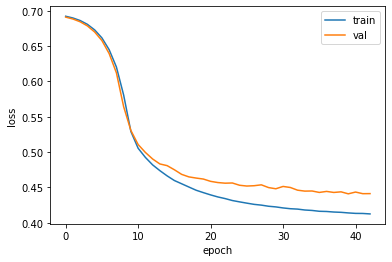

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [57]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 15ms/step - loss: 0.4389 - accuracy: 0.7942


[0.43891969323158264, 0.7942399978637695]